# **CS F320 FODS Assignment 1**


## Assignment1-A:Regression without regularization

### Task1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

# Loading the dataset
DataFrame = pd.read_csv("Data - A1.csv")

# Normalizing the DataFrame
df_mean=DataFrame['X'].mean()
df_std=DataFrame['X'].std()
DataFrame['X']=((DataFrame['X']-df_mean)/df_std)

# Shuffling the DataFrame
DataFrame=DataFrame.sample(frac = 1).reset_index(drop = True)

# Splitting the Dataset in 80% and 20%
train,test=np.split(DataFrame,[int(0.8 * len(DataFrame))])

print(train[:3])
print(train.shape)
print(test[:3])
print(test.shape)

          X         Y
0  0.915797  2.313907
1  0.967733  1.633674
2  0.188699  0.327170
(800, 2)
            X         Y
800 -1.635970 -2.572966
801  0.219861 -0.773345
802  0.832700  0.268848
(200, 2)


### Task2: Polynomial Regression

In [2]:
x_train=np.ones((len(train),1))
y_train=np.ones((len(train),1))

# Placing training features and target in separate matrices
x_train=train['X'].values.reshape(-1,1)
y_train=train['Y'].values.reshape(-1,1)

# Function which takes the training features and transforms them to their respective degree each for 9 models
def DevelopModel(x_train, i):
    n,_ = x_train.shape
    X = np.ones((n, i+1))
    for j in range(1, i+1):
        X[:, j] = x_train[:, 0] ** j
    return X

# Fuction which calculates Least Mean Squares Error
def MeanSqrError(Y_Cap, y_train):
    n, _ = Y_Cap.shape
    Mean_Sqr_Err = np.sum(abs(Y_Cap - y_train) ** 2) * (1 / n)
    return Mean_Sqr_Err

# Function for Batch Gradient Descent
def BGD(lr,X, y_train, W, Y_Cap):
    n, _ = Y_Cap.shape
    # Update rule for BGD
    W = W - (lr * np.dot(X.T, (Y_Cap - y_train)) * (1 / n) )
    return W


#### *Developing 9 Polynomial Models using Batch Gradient Descent*

In [3]:
# Error list of all training models including all iterations from 0 to 500
TrainError = []

# Error list of all training models after all iterations
FinalTrainError = []

# weights of all models
WeightParameters = []

# learning rate
lr = 0.001

# Number of iterations
epochs = 500

# Degree of Model
M = 10

# Function which calculates error and updates weight parameters for all epochs including all models
for i in range(1, M):
    Error_Single_Model = []
    X = DevelopModel(x_train , i)
    W = np.zeros((i+1,1))
    for j in range(epochs):
       Y_Cap = np.dot(X,W)
       Error_Single_Model.append(MeanSqrError(Y_Cap,y_train))
       W = BGD(lr,X, y_train, W, Y_Cap)

    TrainError.append(Error_Single_Model)
    FinalTrainError.append(Error_Single_Model[-1])
    WeightParameters.append(W)

print(FinalTrainError)

[2.409918846654018, 2.1833619688522403, 1.1474353572605802, 1.2104441063598865, 1.2297652767701828, 1.231659236173585, 1.258926275633017, 1.2405403976908944, 1.1716720566488135]


#### *Testing Polynomial Models on Testing Data*

In [4]:
x_test=np.ones((len(test),1))
y_test=np.ones((len(test),1))

# # Placing testing features and target in separate matrices
x_test=test['X'].values.reshape(-1,1)
y_test=test['Y'].values.reshape(-1,1)

# Error list of testing dataset
FinalTestError = []

# Calculating Testing Error for all Models
for i in range(1 , M):
    X = DevelopModel(x_test, i)
    Y_Cap = np.dot(X , WeightParameters[i-1])
    FinalTestError.append(MeanSqrError(Y_Cap, y_test))

print(FinalTestError)

[2.171851818977205, 2.1853713847813636, 1.1774444839255882, 1.3123724493659716, 1.254460316159374, 1.25412877961433, 1.2771151086591095, 1.2414173509568114, 1.193649734175914]


### Task 3: Graph Plotting

##### Final Training and Testing Errors v/s degree of polynomial

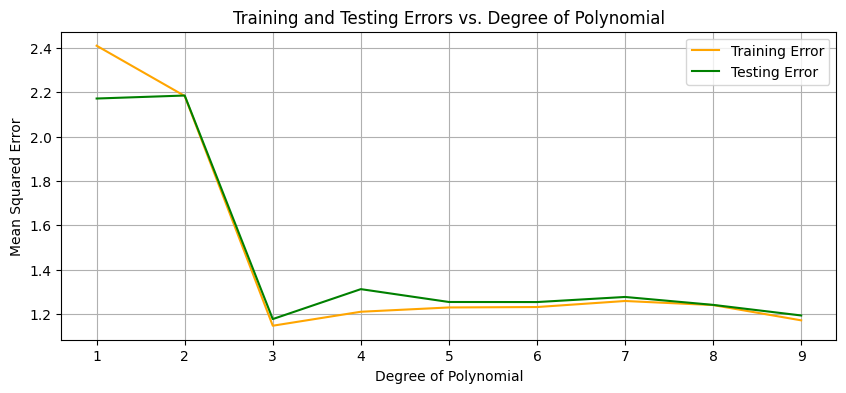

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(range(1, M), FinalTrainError, label = 'Training Error',color = 'orange' )
plt.plot(range(1, M), FinalTestError, label = 'Testing Error',color = 'g' )
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors vs. Degree of Polynomial')
plt.legend()
plt.grid(True)
plt.show()




##### Training Error and Testing Error v/s Epochs for all degree of polynomials in [1,9]

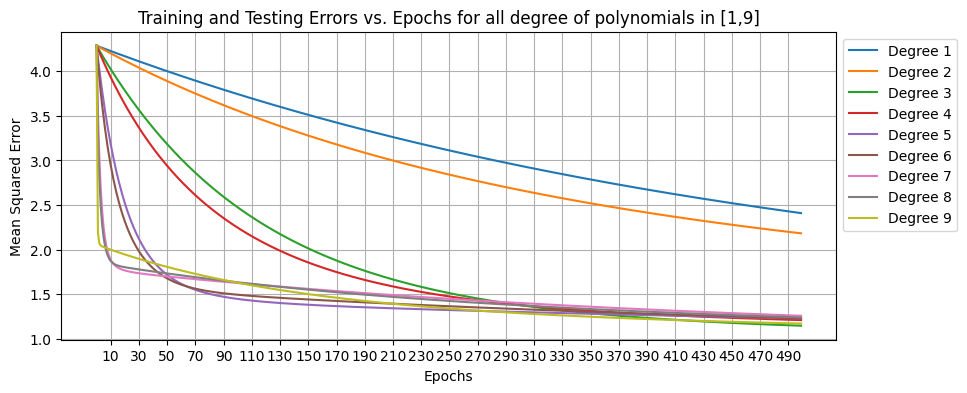

In [6]:
plt.figure(figsize=(10, 4))
for degree in range(M - 1):
    plt.plot(range(0 , epochs), TrainError[degree][0:epochs], label = f'Degree {degree+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Testing Errors vs. Epochs for all degree of polynomials in [1,9]')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(range(10, epochs+1, 20))
    plt.grid(True)
plt.show()

##### The best polynomial fitted curve on the data points

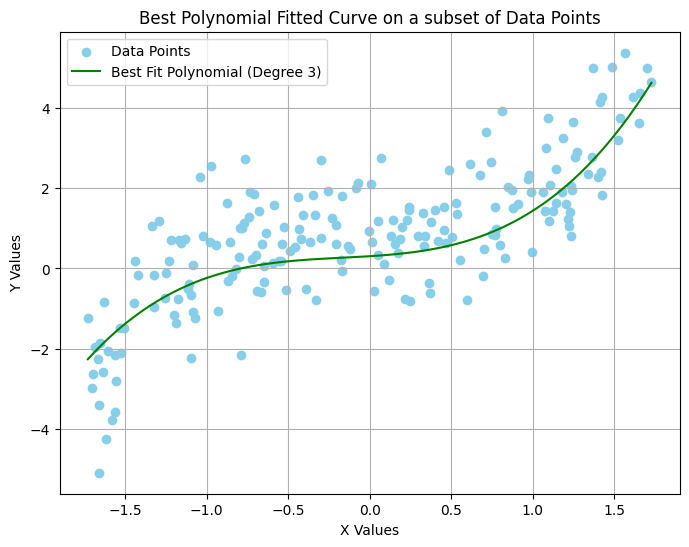

In [7]:
plt.figure(figsize=(8, 6))

# Finding the degree of the best model (degree with the lowest final training error)
best_degree = np.argmin(FinalTestError) + 1  # Adding 1 because degree starts from 1 in our code

# Retrieving the coefficients of the best model
best_model_coefficients = WeightParameters[best_degree - 1]  # -1 because the list is 0-indexed

# Ploting Data Points
plt.scatter(x_test, y_test, label='Data Points', color='skyblue')

# Generate polynomial values for the entire range of x using the best model's coefficients
x_values = np.linspace(min(x_test), max(x_test), 100)
X_best_model = DevelopModel(x_values.reshape(-1, 1), best_degree)
y_fitted = np.dot(X_best_model, best_model_coefficients)

# Ploting the best polynomial fitted curve
plt.plot(x_values, y_fitted, label=f'Best Fit Polynomial (Degree {best_degree})', color='g')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Best Polynomial Fitted Curve on a subset of Data Points')
plt.legend()
plt.grid(True)
plt.show()


### Task 4: Comparative Analysis

**Insights:**

1. Degree 1:
Training Error: 2.4,
Testing Error: 2.2,
Interpretation: Degree 1 represents a simple linear model with high bias (underfitting). Both training and testing errors are high, indicating that the model is too simple to capture the underlying patterns in the data.

2. Degree 2:
Training Error: 2.12,
Testing Error: 1.9 (approximately),
Interpretation: The model's performance improves as the degree increases to 2. Training and testing errors decrease, suggesting a better fit to the data compared to the linear model.

3. Degree 3:
Training Error: 1.2,
Testing Error: 1.0 (approximately),
Interpretation: The model achieves its best performance at degree 3. Both training and testing errors are low, indicating that the model has a good balance between bias and variance.

4. Degree 4 to Degree 9:
Training Error increases slightly (approximately 0.15) from 1.2 to 1.3.
Testing Error increases slightly (approximately 0.15) from 1.0 to 1.15.
Interpretation: The model begins to overfit the data as the degree increases beyond 3. Both training and testing errors increase, suggesting that the model is becoming too complex and fitting noise in the data.

**Key Takeaways:**
1. The best models are observed at degrees 3, where both training and testing errors are low, indicating a good balance between bias and variance.

2. As the degree increases beyond 3, the models start to overfit the data, resulting in higher testing errors, even though training errors might decrease.

3. The fluctuations in training and testing errors beyond degree 3 suggest that finding the right degree of the polynomial is crucial to achieving good model performance.

4. A degree of 9 is not necessarily better than a degree of 3, as it can lead to unnecessary model complexity without significant gains in predictive performance.

In practice, it is important to choose a model complexity that generalizes well to unseen data (i.e., the testing error is low), which is typically achieved by selecting a degree between 2 and 3 in this case.




## Assignment1-B Polynomial Regression and Regularization

### Task1: Data Preprocessing

In [8]:
import pandas as pd
import numpy as np
import random as r

# Loading the dataset into pandas dataframe
DataFrameB = pd.read_csv("Fish Data - A2.csv")

DataFrameB[:3]

Height   Width  Weight
0  11.5200  4.0200   242.0
1  12.4800  4.3056   290.0
2  12.3778  4.6961   340.0

In [9]:
# Getting column names
columns = DataFrameB.columns

# Dropping the last column name
features = columns[:-1]
print(features)

Index(['Height', 'Width'], dtype='object')


In [10]:
# Normalizing feature variables
DataFrameB[features] = (DataFrameB[features] - DataFrameB[features].mean()) / DataFrameB[features].std()

# Removing Nan/null values
DataFrameB.fillna(DataFrameB.mean(), inplace = True)

# Shuffling the dataset
DataFrameB = DataFrameB.sample(frac = 1).reset_index(drop = True)

# Splitting the dataset in 4 : 1 ratio
trainB, testB = np.split(DataFrameB, [int(0.8 * len(DataFrameB))])
print(trainB[:3])
print(trainB.shape)
print(testB[:3])
print(testB.shape)

     Height     Width  Weight
0 -0.804556 -0.250614   110.0
1 -0.367270 -0.172194   200.0
2 -0.654027 -0.606112   110.0
(127, 3)
       Height     Width  Weight
127 -0.301197  0.568580   770.0
128 -1.576474 -1.858867    10.0
129 -0.469178  0.283849   500.0
(32, 3)


#### *Surface plot of all the data points:*

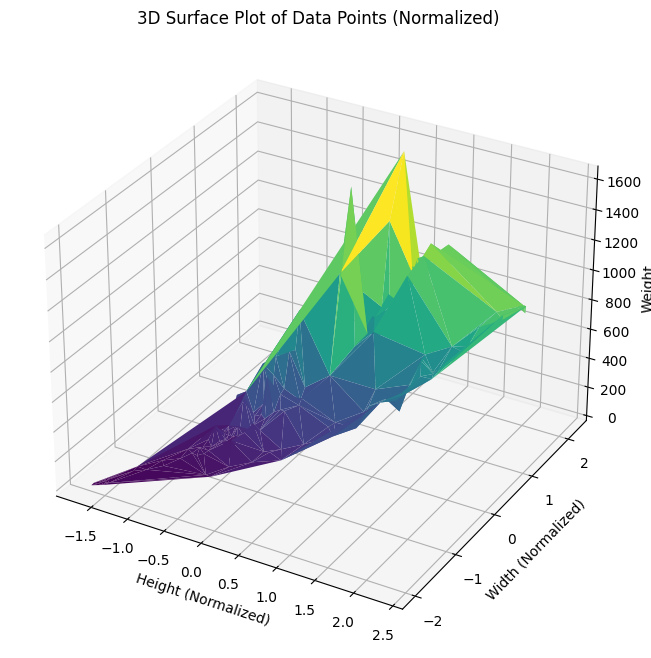

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

feature1 = DataFrameB['Height']
feature2 = DataFrameB['Width']
target = DataFrameB['Weight']

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(feature1, feature2, target, cmap='viridis', edgecolor='none')
ax.set_xlabel('Height (Normalized)')
ax.set_ylabel('Width (Normalized)')
ax.set_zlabel('Weight')
ax.set_title('3D Surface Plot of Data Points (Normalized)')
plt.show()

### Task2: Polynomial Regression

In [12]:
x_trainB = np.ones((len(trainB), len(features)))
y_trainB = np.ones((len(trainB), 1))
x_trainB = trainB[features].values.reshape(len(trainB), len(features))
y_trainB = trainB[columns[-1]].values.reshape(len(trainB), 1)

In [13]:
# Function which takes the training features and transforms them to their respective degree each for 9 models
def DevelopModel(x_trainB, i):
    n,_ = x_trainB.shape
    X = np.ones((n, i+1))
    for j in range(1, i+1):
        # X[:, j] = x_trainB[:] ** j
        X[:, j] = x_trainB[:, 0] ** j
    return X

# Fuction which calculates Least Mean Squares Error
def MeanSqrError(Y_Cap, y_trainB):
    n, _ = Y_Cap.shape
    Mean_Sqr_Err = np.mean(abs(Y_Cap - y_trainB) ** 2) * (1 / n)
    return Mean_Sqr_Err

# Function for Batch Gradient Descent
def BGD(lr,X, y_trainB, W, Y_Cap):
    n, _ = Y_Cap.shape
    # Update rule for BGD
    W = W - (lr * np.dot(X.T, (Y_Cap - y_trainB)) * (1 / n) )
    return W

# Function that transforms both the features into one single feature(Polynomial Transformation)
# Here we are considering our Polynomial transformation function as (X1+X2)/2
def Polynomial_Transform_Phi(X_poly):
    phiX =  (X_poly[:, 0] + X_poly[:, 1]) / 2
    return phiX.reshape(-1, 1)


#### *Developing 9 Polynomial Models using Batch Gradient Descent*

In [14]:
# Error list of all training models including all iterations from 0 to 500
TrainError_B = []

# Error list of all training models after all iterations
FinalTrainError_B = []

# weights of all models
WeightParameters_B = []
Y_Predicted_B = []

# learning rate
lr = 0.00001;

# Number of iterations
epochs = 500000

# Degree of Model
M = 10

# Transforming both features into single feature Phi_x
Phi_x = Polynomial_Transform_Phi(x_trainB)

# Function which calculates error and updates weight parameters for all epochs including all models
for i in range(1, M):
    Error_Single_Model_B = []
    X_B = DevelopModel(Phi_x , i)
    W_B = np.ones((i+1,1))
    W_B *= 38
    # W_B = np.random.rand(i+1,1)
    for j in range(epochs):
       Y_Cap_B = np.dot(X_B,W_B)
       Error_Single_Model_B.append(MeanSqrError(Y_Cap_B,y_trainB))
       W_B = BGD(lr,X_B, y_trainB, W_B, Y_Cap_B)
    Y_Predicted_B.append(np.dot(X_B,W_B))


    TrainError_B.append(Error_Single_Model_B)
    FinalTrainError_B.append(Error_Single_Model_B[-1])
    WeightParameters_B.append(W_B)

print(FinalTrainError_B)

[257.02268054488036, 231.06900938512845, 260.7122583330713, 250.5662375282072, 228.78869032834328, 241.00886583805791, 251.36555536490775, 243.94931317881407, 233.50291838696387]


#### *Testing Polynomial Models on Testing Data*

In [15]:
# Seperating features and targets
x_testB = np.ones((len(testB), len(features)))
y_testB = np.ones((len(testB), 1))
x_testB = testB[features].values.reshape(len(testB), len(features))
y_testB = testB[columns[-1]].values.reshape(len(testB), 1)

Phi_test_B = Polynomial_Transform_Phi(x_testB)

FinalTestError_B = []
Y_PredictedTest_B = []

for i in range(1, M):
    X_B = DevelopModel(Phi_test_B,i)
    Y_cap_B = np.dot(X_B, WeightParameters_B[i - 1])
    Y_PredictedTest_B.append(Y_cap_B)
    FinalTestError_B.append(MeanSqrError(Y_cap_B, y_testB))

print(FinalTestError_B)

[1437.2531856538164, 1433.1380197970389, 1689.8106948440795, 1573.5290695008239, 1428.8661017908373, 1539.6527651056363, 1604.136159081153, 1596.4821800426432, 1494.2171759777357]


#### *Plotting Graphs to choose the bestfit model*

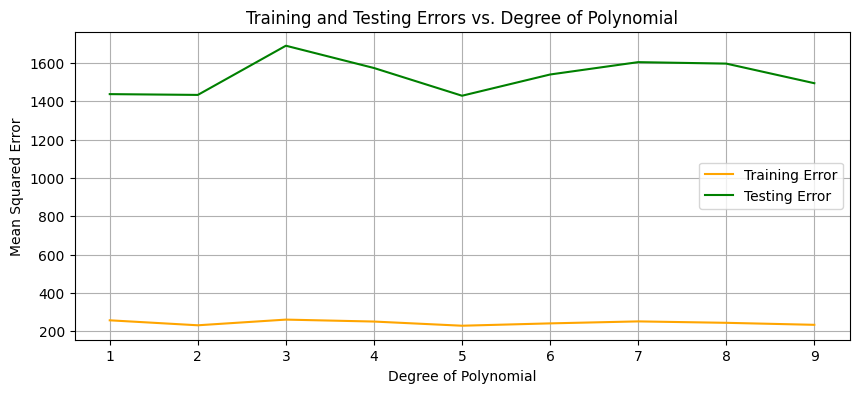

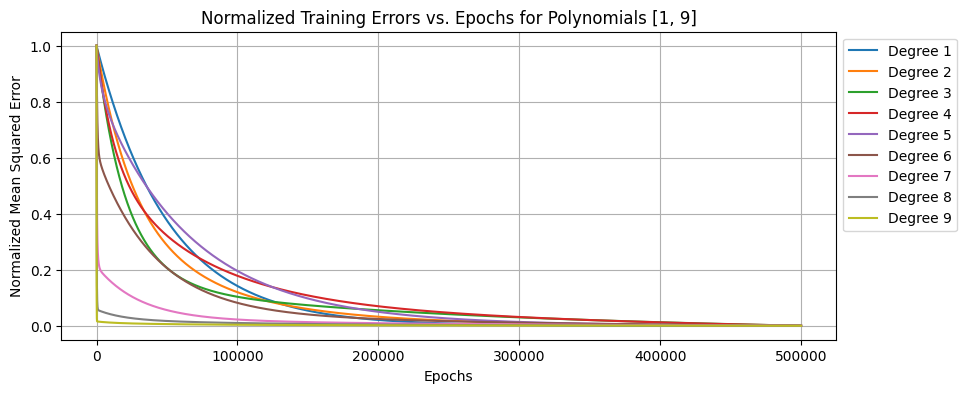

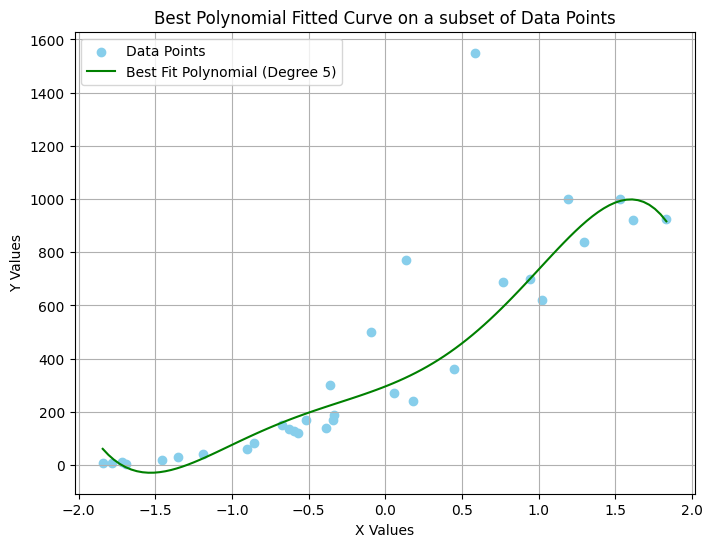

In [16]:
# Final Training and Testing Errors v/s degree of polynomial
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(range(1, M), FinalTrainError_B, label = 'Training Error',color = 'orange' )
plt.plot(range(1, M), FinalTestError_B, label = 'Testing Error',color = 'g' )
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors vs. Degree of Polynomial')
plt.legend()
plt.grid(True)
plt.show()

# Training Error and Testing Error v/s Epochs for all degree of polynomials in [1,9]
plt.figure(figsize=(10, 4))
for degree in range(M - 1):
    normalized_errors = (TrainError_B[degree][:epochs] - min(TrainError_B[degree][:epochs])) / (max(TrainError_B[degree][:epochs]) - min(TrainError_B[degree][:epochs]))
    plt.plot(range(epochs), normalized_errors, label=f'Degree {degree+1}')

plt.xlabel('Epochs')
plt.ylabel('Normalized Mean Squared Error')
plt.title('Normalized Training Errors vs. Epochs for Polynomials [1, 9]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


# Ploting the best polynomial fitted curve
plt.figure(figsize=(8, 6))
best_degree = np.argmin(FinalTrainError_B) + 1  # Finding the degree of the best model (degree with the lowest final training error)
best_model_coefficients = WeightParameters_B[best_degree - 1]  # Retrieving the coefficients of the best model
plt.scatter(Phi_test_B, y_testB, label='Data Points', color='skyblue')  # Ploting Data Points

# Generate polynomial values for the entire range of x using the best model's coefficients
x_values = np.linspace(min(Phi_test_B), max(Phi_test_B), 100)
X_best_model = DevelopModel(x_values.reshape(-1, 1), best_degree)
y_fitted = np.dot(X_best_model, best_model_coefficients)
plt.plot(x_values, y_fitted, label=f'Best Fit Polynomial (Degree {best_degree})', color='g')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Best Polynomial Fitted Curve on a subset of Data Points')
plt.legend()
plt.grid(True)
plt.show()



#### *Plotting Surface Plots for Training Predictions*

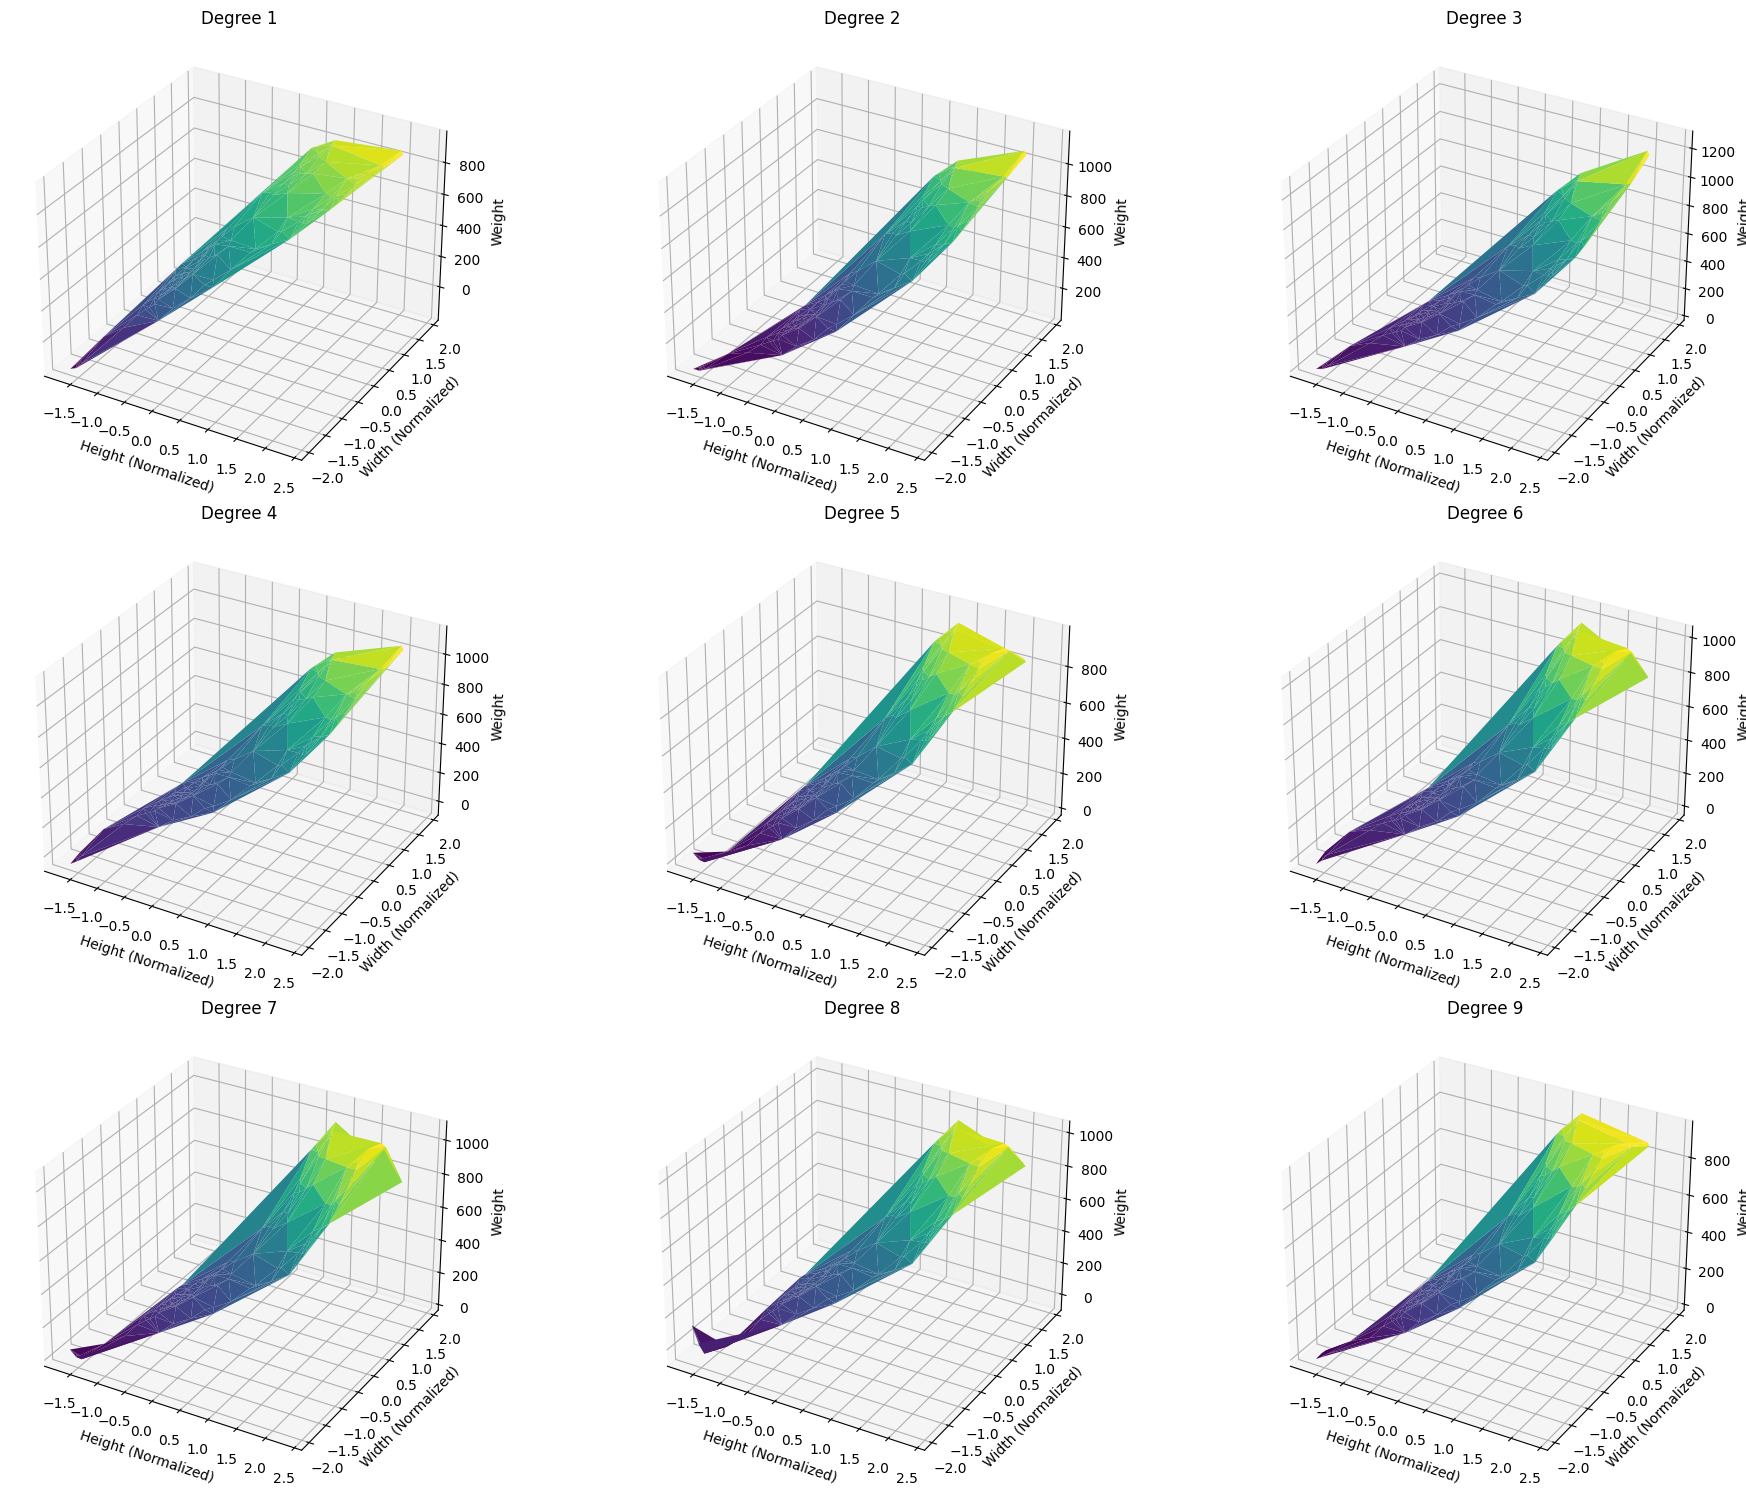

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

feature1 = x_trainB[:, 0]
feature2 = x_trainB[:, 1]

# Create a 3D surface plot
fig = plt.figure(figsize=(20, 15))

for i in range(1, M):
    target = Y_Predicted_B[i - 1].reshape(len(feature1))
    ax = fig.add_subplot(3, 3, i, projection='3d')
    ax.plot_trisurf(feature1, feature2, target, cmap='viridis', edgecolor='none')
    ax.set_xlabel('Height (Normalized)')
    ax.set_ylabel('Width (Normalized)')
    ax.set_zlabel('Weight')
    ax.set_title(f'Degree {i}')

plt.tight_layout()
plt.show()

#### *Plotting Surface Plots for Testing Predictions*

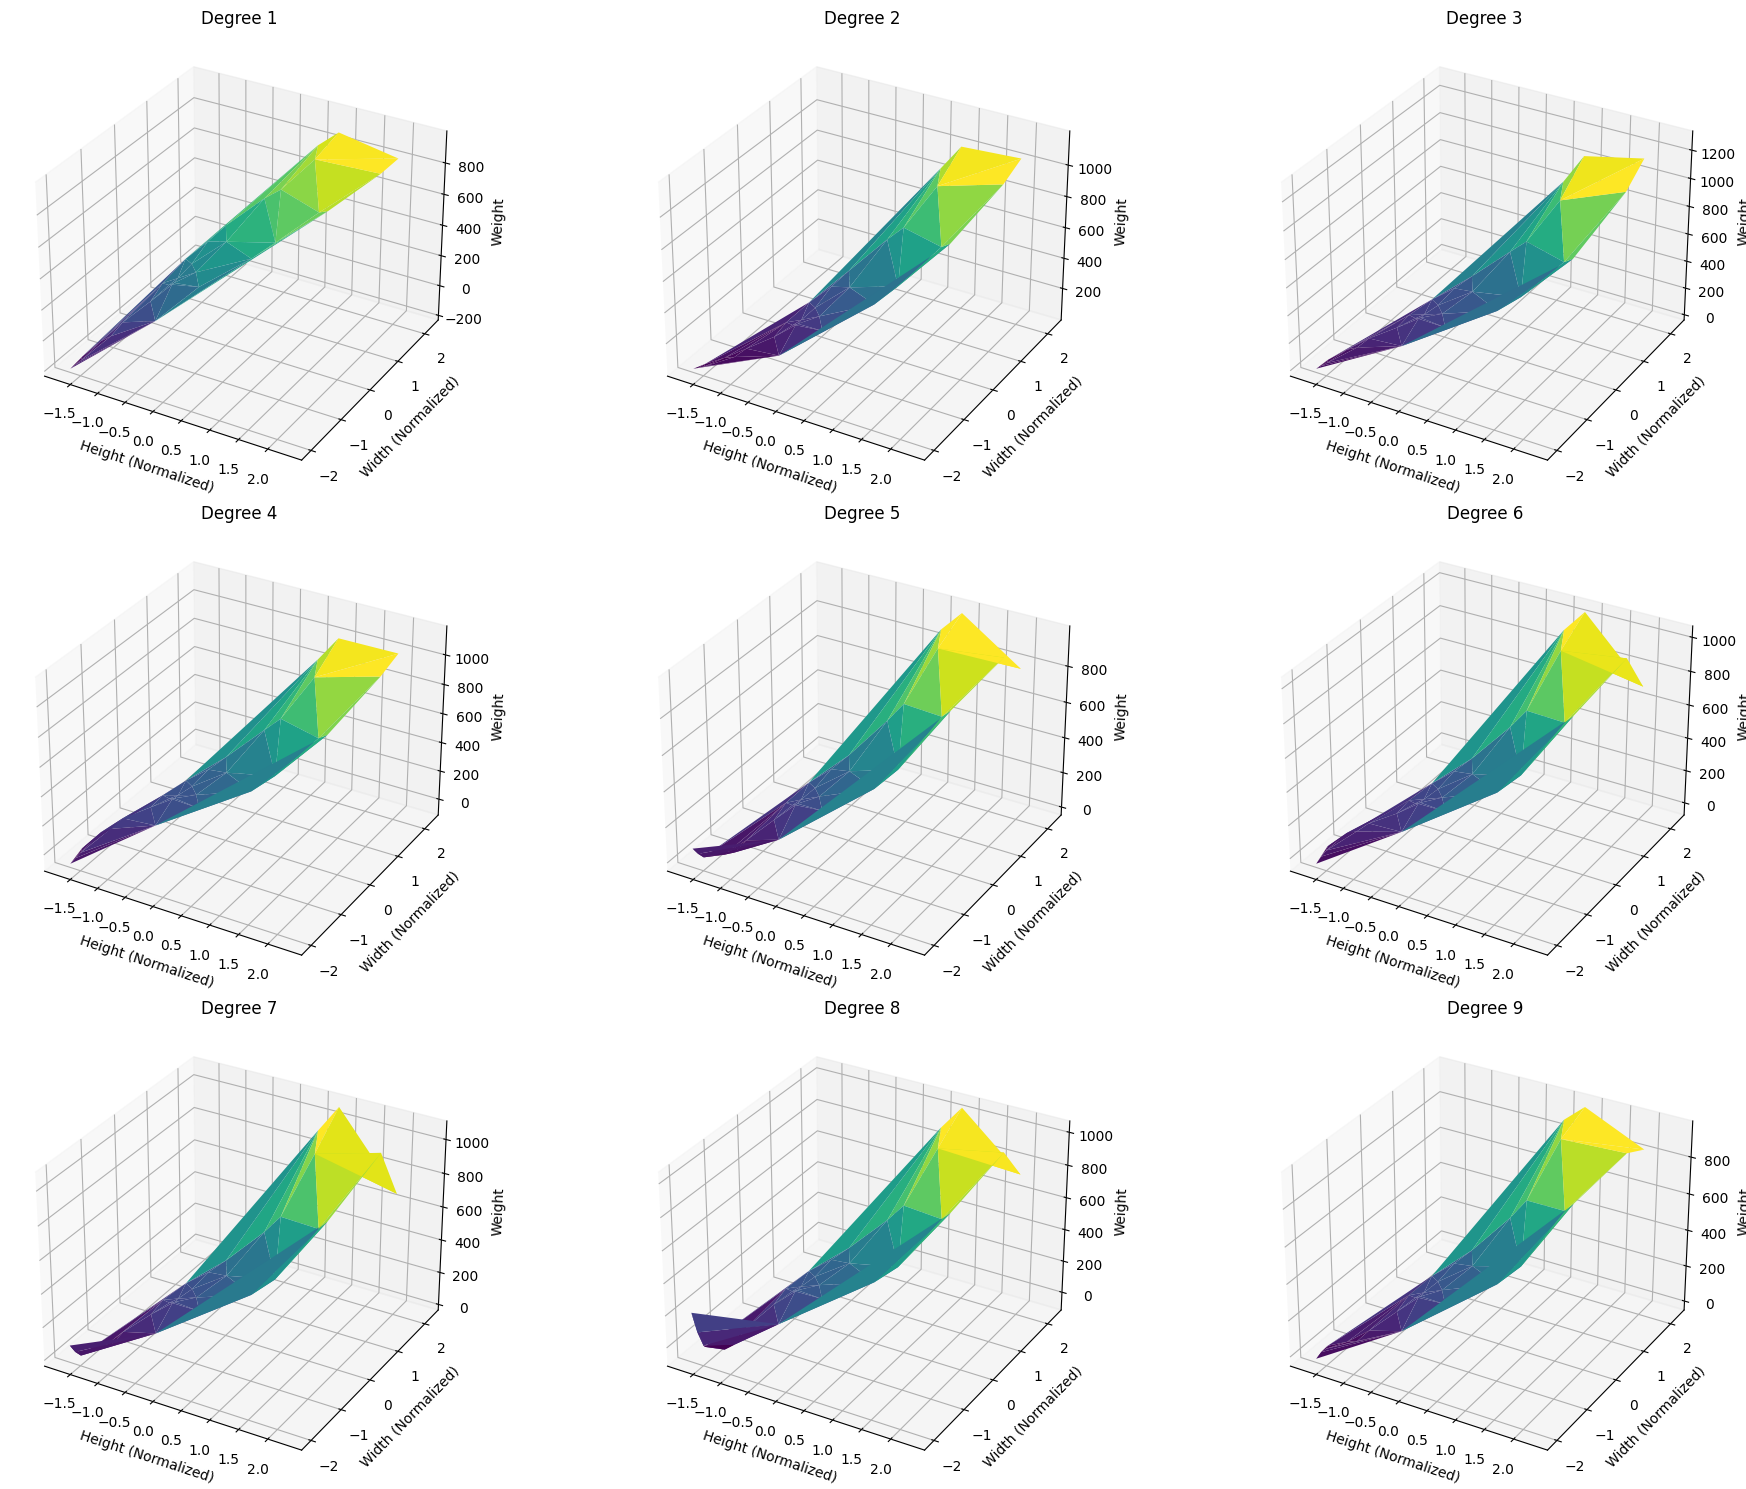

In [18]:
import pandas as pd

feature1 = x_testB[:, 0]
feature2 = x_testB[:, 1]

# Create a 3D surface plot
fig = plt.figure(figsize=(20, 15))

for i in range(1, M):
    target = Y_PredictedTest_B[i - 1].reshape(len(feature1))
    ax = fig.add_subplot(3, 3, i, projection='3d')
    ax.plot_trisurf(feature1, feature2, target, cmap='viridis', edgecolor='none')
    ax.set_xlabel('Height (Normalized)')
    ax.set_ylabel('Width (Normalized)')
    ax.set_zlabel('Weight')
    ax.set_title(f'Degree {i}')

plt.tight_layout()
plt.show()

#### *Surface Plots for Non-Regularized Polynomials:*

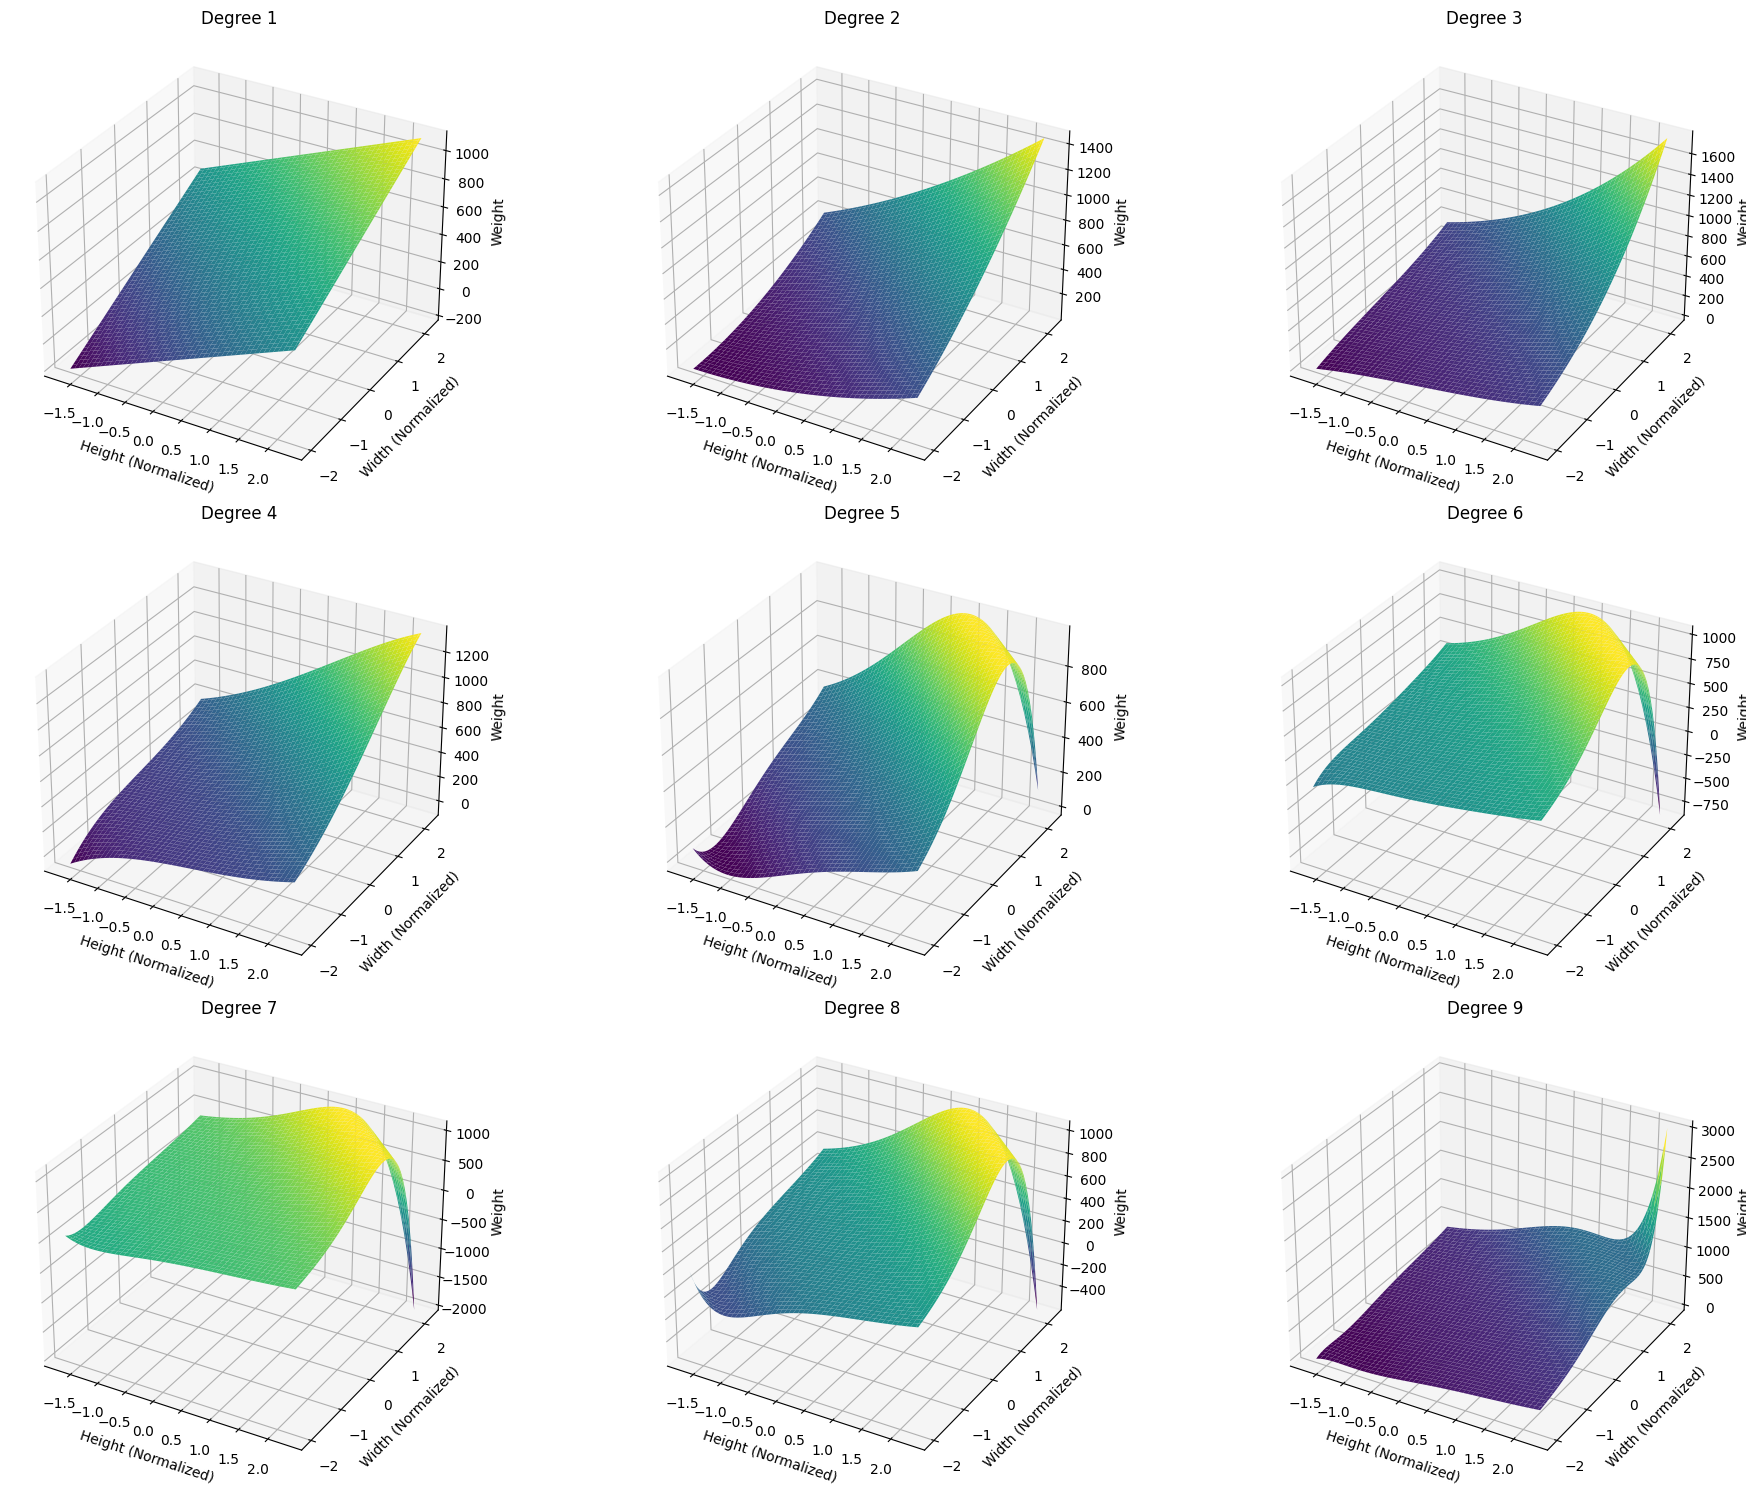

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data for the surface plot
x_range = np.linspace(min(x_testB[:, 0]), max(x_testB[:, 0]), 100)
y_range = np.linspace(min(x_testB[:, 1]), max(x_testB[:, 1]), 100)
X, Y = np.meshgrid(x_range, y_range)

# Create a new figure
fig = plt.figure(figsize=(20, 15))

for i in range(1, M):
    # Develop model for the current degree
    X_test_model = DevelopModel(Polynomial_Transform_Phi(np.column_stack((X.flatten(), Y.flatten()))), i)
    # Predict using the trained model
    Z = np.dot(X_test_model, WeightParameters_B[i - 1]).reshape(X.shape)

    # Create 3D subplot
    ax = fig.add_subplot(3, 3, i, projection='3d')
    ax.set_title(f'Degree {i}')

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('Height (Normalized)')
    ax.set_ylabel('Width (Normalized)')
    ax.set_zlabel('Weight')

plt.tight_layout()
plt.show()


### Performing Regularization on Bestfit

In [20]:
# Code of Batch Gradient Descent including regularization constant
def bgdRegularized(X_Pol_B, W, Y_cap_B, Y, lrR, Regularization_Lambda, q):
    gradient = np.dot(X_Pol_B.T, (Y_cap_B - Y))
    # for q=0.5
    if q == 0.5:
        gradient += (Regularization_Lambda / 4) * ((abs(W)) ** (-0.5))
    # for q=1
    elif q == 1:
        gradient += (Regularization_Lambda / 2) * np.sign(W)
    # for q=2
    elif q == 2:
        gradient += Regularization_Lambda * W
    # for q=4
    elif q == 4:
        gradient += (2 * Regularization_Lambda) * (W ** 3)

    W -= lrR * gradient
    return W

In [21]:
# Code of Stochastic Gradient Descent including regularization constant
def sgdRegularized(X_poly_B, W, Y_cap_B, Y, index, lrR, Regularization_Lambda, q):
    gradient = np.dot(X_poly_B[index, :].reshape(-1, 1), (Y_cap_B[index] - Y[index]).reshape(-1, 1))
    # for q=0.5
    if q == 0.5:
        gradient += (Regularization_Lambda / 4) * (abs(W) ** (-0.5))
    # for q=1
    elif q == 1:
        gradient += (Regularization_Lambda / 2) * np.sign(W)
    # for q=2
    elif q == 2:
        gradient += Regularization_Lambda * W
    # for q=4
    elif q == 4:
        gradient += (2 * Regularization_Lambda) * (W ** 3)

    W -= lrR * gradient
    return W

In [22]:
# Code for Mean Square Error after Regularization
def LMSErrorRegularized(Y_cap_B, Y, Regularization_Lambda, q, W):
    Regularization_Error = 0.0
    n, _ = Y_cap_B.shape
    # for q=0.5
    if q == 0.5:
        Regularization_Error = (Regularization_Lambda / 2) * np.sum((abs(W) ** (0.5)))
     # for q=1
    elif q == 1:
        Regularization_Error = (Regularization_Lambda / 2) * np.sum((abs(W)))
     # for q=2
    elif q == 2:
        Regularization_Error = (Regularization_Lambda / 2) * np.sum((W ** 2))
     # for q=4
    elif q == 4:
        Regularization_Error = (Regularization_Lambda / 2) * np.sum((W ** 4))

    Total_Error = (1/n) * np.mean((Y_cap_B - Y) ** 2) + Regularization_Error
    return Total_Error

### *Batch Gradient Descent:*

In [23]:
trainingErrorsBGD = [None] * 4
weights_regularizedBGD = [None] * 4
finalTrainingErrorsBGD = [None] * 4
finalTestingErrorsBGD = [None] * 4

X_poly = DevelopModel(Phi_x, best_degree)
X = DevelopModel(Phi_test_B, best_degree)

### *Developing Models for different regularization powers using Batch Gradient Descent*

In [24]:
learning_rate = 0.0001
epochs = 20000

# List of regularization rates
regularization_ratesBGD = [0.001, 0.001, 0.000001, 0.00000000001]

# List of regularization powers
Q = [0.5, 1, 2, 4]

for q in range(4):
    errors = []
    w = np.ones((best_degree + 1,1))
    for j in range(epochs):
        y_cap = np.dot(X_poly, w)
        errors.append(LMSErrorRegularized(y_cap, y_trainB, regularization_ratesBGD[q], Q[q], w))
        w = bgdRegularized(X_poly, w, y_cap, y_trainB, learning_rate, regularization_ratesBGD[q], q)

    weights_regularizedBGD[q] = w
    trainingErrorsBGD[q] = errors
    finalTrainingErrorsBGD[q] = errors[-1]

    y_cap = np.dot(X, weights_regularizedBGD[q])
    finalTestingErrorsBGD[q] = LMSErrorRegularized(y_cap, y_testB, regularization_ratesBGD[q], Q[q], weights_regularizedBGD[q])

print(finalTrainingErrorsBGD)
print(finalTestingErrorsBGD)

[220.35399140593353, 220.72509209211762, 220.4426608246176, 220.4552541270797]
[1271.523267005082, 1271.8943526506919, 1271.6119850029208, 1271.6245298670729]


#### *Surface Plot for all four Q values for BGD:*

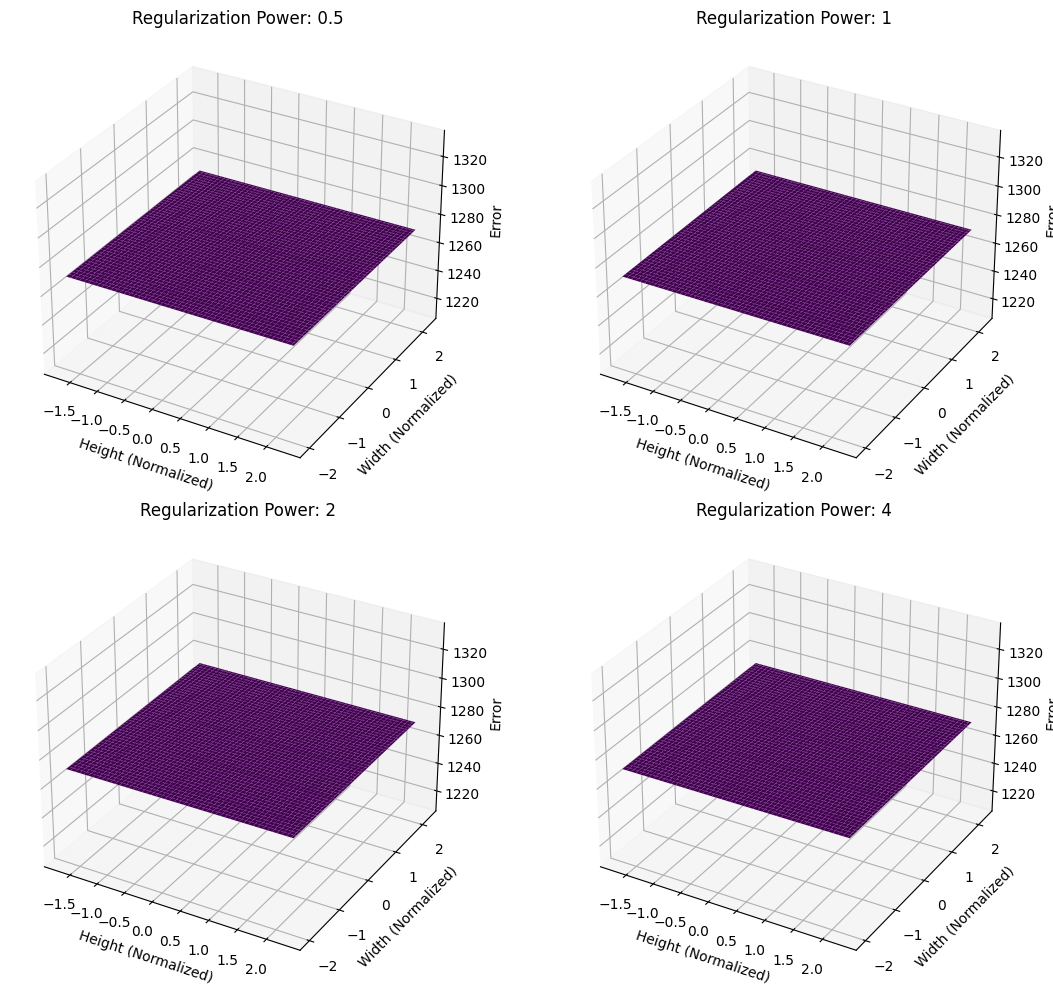

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

regularization_powers = [0.5, 1, 2, 4]

# Generate sample data for the surface plots
feature_1_values = np.linspace(np.min(x_testB[:, 0]), np.max(x_testB[:, 0]), 100)  # Corrected min and max usage
feature_2_values = np.linspace(np.min(x_testB[:, 1]), np.max(x_testB[:, 1]), 100)  # Corrected min and max usage
feature_1_mesh, feature_2_mesh = np.meshgrid(feature_1_values, feature_2_values)

# Create a new figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

for i, q in enumerate(regularization_powers):
    current_error = finalTestingErrorsBGD[i]

    # Create a 2D grid for current_error
    error_mesh = np.tile(current_error, (len(feature_1_values), 1))

    # Plot the surface for Height, Width, and Error
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot_surface(feature_1_mesh, feature_2_mesh, error_mesh, cmap='viridis')
    ax.set_xlabel('Height (Normalized)')
    ax.set_ylabel('Width (Normalized)')
    ax.set_zlabel('Error')
    ax.set_title(f'Regularization Power: {q}')

# Adjust layout
plt.tight_layout()
plt.show()


### *Stchastic Gradient Descent:*

In [26]:
trainingErrorsSGD = [None] * 4
weights_regularizedSGD = [None] * 4
finalTrainingErrorsSGD = [None] * 4
finalTestingErrorsSGD = [None] * 4

X_poly = DevelopModel(Phi_x, best_degree)

### *Developing Models for different regularization powers using Stchastic Gradient Descent*

In [27]:
learning_rate = 0.0001
epochs = 200000

# List of regularization rates
regularization_ratesSGD = [0.000001, 0.0000001, 0.00000000001, 0.00000000000001]

# List of regularization powers
Q = [0.5, 1, 2, 4]

for q in range(4):
    errors = []
    w = np.ones((best_degree + 1,1))
    for j in range(epochs):
        y_cap = np.dot(X_poly, w)
        index = r.randint(0, len(y_cap) - 1)
        errors.append(LMSErrorRegularized(y_cap, y_trainB, regularization_ratesSGD[q], Q[q], w))
        w = sgdRegularized(X_poly, w, y_cap, y_trainB, index, learning_rate, regularization_ratesSGD[q], q)

    weights_regularizedSGD[q] = w
    trainingErrorsBGD[q] = errors
    finalTrainingErrorsSGD[q] = errors[-1]

    y_cap = np.dot(X, weights_regularizedSGD[q])
    finalTestingErrorsSGD[q] = LMSErrorRegularized(y_cap, y_testB, regularization_ratesSGD[q], Q[q], weights_regularizedSGD[q])

print(finalTrainingErrorsSGD)
print(finalTestingErrorsSGD)

[220.3252215762344, 220.32523300566217, 220.32519422881185, 220.32532340930882]
[1270.9211447225277, 1270.9211561504485, 1270.9211173756025, 1270.9212465556022]


#### *Surface Plot for all four Q values for SGD:*

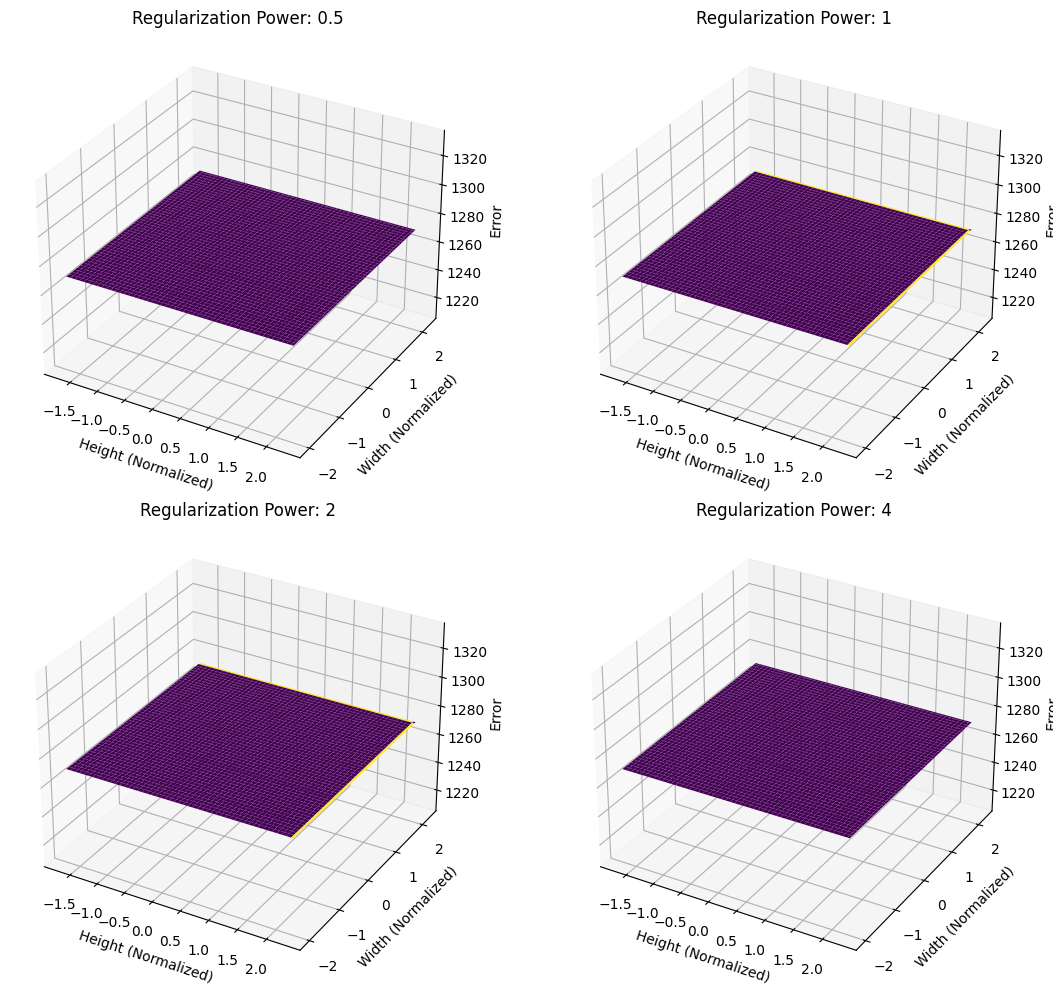

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

regularization_powers = [0.5, 1, 2, 4]

feature_1_values = np.linspace(np.min(x_testB[:, 0]), np.max(x_testB[:, 0]), 100)  # Corrected min and max usage
feature_2_values = np.linspace(np.min(x_testB[:, 1]), np.max(x_testB[:, 1]), 100)  # Corrected min and max usage
feature_1_mesh, feature_2_mesh = np.meshgrid(feature_1_values, feature_2_values)

# Create a new figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

for i, q in enumerate(regularization_powers):
    # Get error values for the current regularization power
    current_error = finalTestingErrorsSGD[i]

    # Create a 2D grid for current_error
    error_mesh = np.tile(current_error, (len(feature_1_values), 1))

    # Plot the surface for Height, Width, and Error
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot_surface(feature_1_mesh, feature_2_mesh, error_mesh, cmap='viridis')
    ax.set_xlabel('Height (Normalized)')
    ax.set_ylabel('Width (Normalized)')
    ax.set_zlabel('Error')
    ax.set_title(f'Regularization Power: {q}')

# Adjust layout
plt.tight_layout()
plt.show()

### Task 4: Comparative Analysis:

###**Insights:**

####*Polynomial Regression Without Regularization:*


1.   As the degree of the polynomial increases, training errors generally decrease. However, testing errors increase after a certain point (degree 5 in this case), indicating overfitting.

2.   Degree 5 polynomial model has the lowest testing error, making it the best fit among the tested degrees.

####*Batch Gradient Descent with Regularization (for Best Fit Polynomial Model):*

1.   Training errors are slightly reduced with regularization, indicating the regularization is controlling overfitting to some extent.

2.   Testing errors, however, remain high, suggesting the model still struggles to generalize well to unseen data.

####*Stochastic Gradient Descent with Regularization (for Best Fit Polynomial Model):*

1.   Training errors with stochastic gradient descent and regularization are similar to batch gradient descent.
2.   Testing errors are also similar to batch gradient descent, indicating that stochastic gradient descent does not significantly improve generalization.

####*Conclusion:*


1.   The degree 5 polynomial model performs the best without regularization, but it still suffers from overfitting when applied to unseen data.
2.   Regularization mitigates overfitting and significantly improves the model's generalization ability.

